In [1]:
import os
import numpy as np
import pandas as pd
import tqdm
import json
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from picconfig import predpath, pripath, survpath, pripathds, outputpath, numericpath

In [2]:
legend_names = ["Essential Information", "+ Detailed Information", "+ Minor Information", ]

In [3]:
seqhue=[]
seqgroup=[]
seqdata=[]
for i in range(1,7):
    for j in range(1,3):
        filename = pripath + str(i) + '10_' + str(j) + '.npy'
        temp = np.load(filename)
        seqdata += temp.tolist()
        seqgroup += [str(i)] * len(temp)
        seqhue += [str(j)] * len(temp)
for i in range(1,7):
    j = 3
    para = 3
    filename = predpath + str(i) + '10_' + str(para) + '.npy'
    temp = np.load(filename)
    seqdata += temp.tolist()
    seqgroup += [str(i)] * len(temp)
    seqhue += [str(j)] * len(temp)
df = pd.DataFrame({'group':seqgroup,'hue':seqhue,'data':seqdata})

In [4]:
seqhue=[]
seqgroup=[]
seqdata=[]
for i in range(1,7):
    for j in range(1,3):
        filename = pripathds + str(i) + '10_' + str(j) + '.npy'
        temp = np.load(filename)
        # print(np.sum(np.isnan(temp)))
        seqdata += temp.tolist()
        seqgroup += [str(i)] * len(temp)
        seqhue += [str(j)] * len(temp)
for i in range(1,7):
    j = 3
    para = 0
    filename = survpath + str(i) + '10_' + str(para) + '.npy'
    temp = np.load(filename)
    seqdata += temp.tolist()
    seqgroup += [str(i)] * len(temp)
    seqhue += [str(j)] * len(temp)
dfds = pd.DataFrame({'group':seqgroup,'hue':seqhue,'data':seqdata})

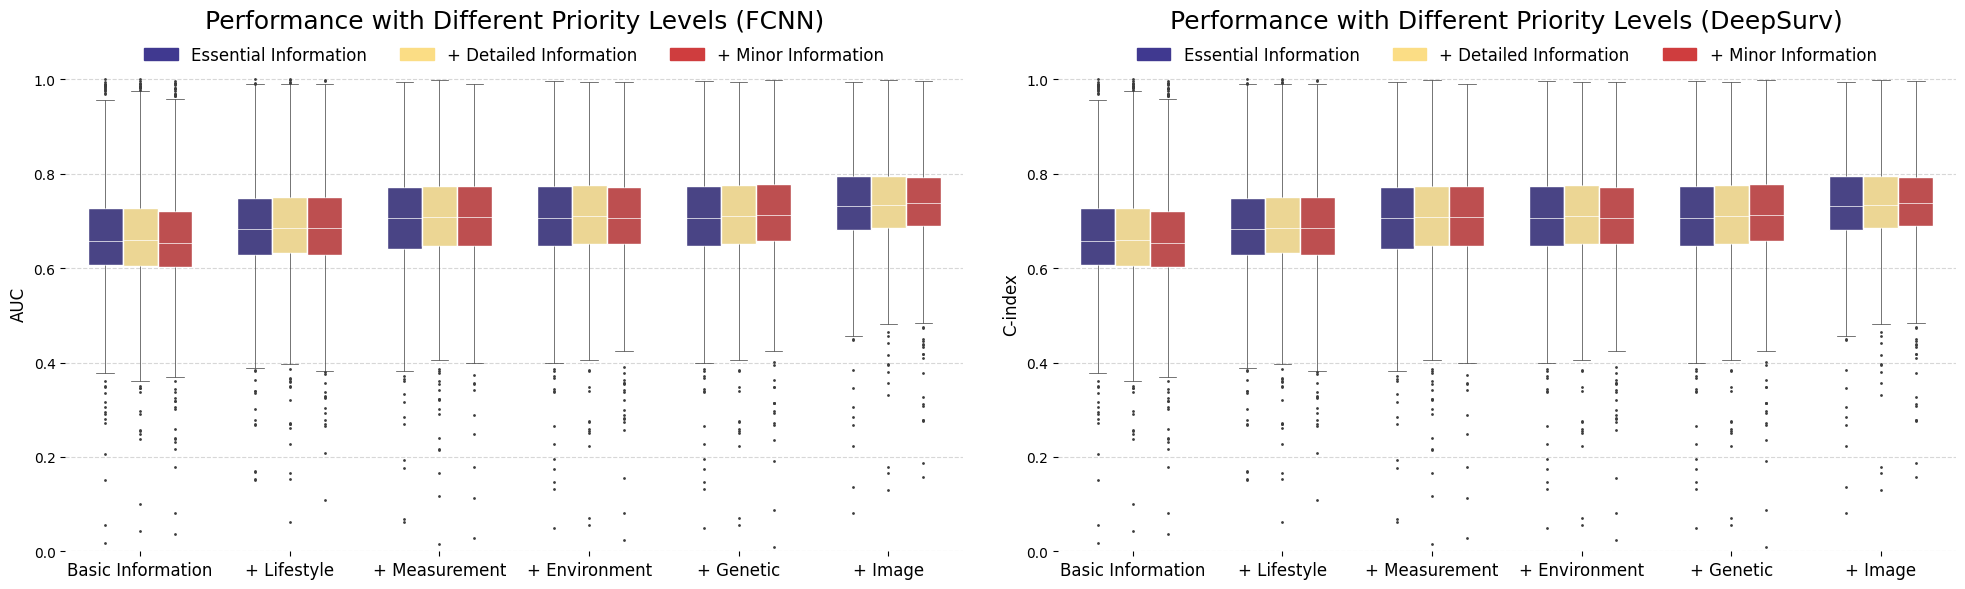

In [5]:
from matplotlib.patches import Patch
title = 'Performance with Different Priority Levels'
colors = ['#403990','#80A6E2','#FBDD85','#F46F43','#CF3D3E']
cm = LinearSegmentedColormap.from_list('Nature', colors, N=3)
colorlist = []
for i in range(3):
    colorlist.append(cm(i))
color_palette = sns.color_palette(colorlist)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
# plt.figure(dpi=500, figsize=(10,6))
# plt.locator_params(axis='y', nbins=11)
axes[0].grid(True,linestyle='--',alpha=0.5)
sns.boxplot(y='data',x='group',hue='hue',palette=color_palette,data=df, whis=2, fliersize=1, notch=False,
            showfliers=True, width = 0.7, boxprops={'linewidth': 1, 'linestyle':"-", 'edgecolor':'white'}, whiskerprops={'linestyle': '-', 'linewidth': 0.5},
            capprops={'linewidth': 0.5}, medianprops={'linewidth': 0.5, 'color':'white'}, gap=0, ax=axes[0])
names=['Basic Information','+ Lifestyle','+ Measurement','+ Environment','+ Genetic', '+ Image']
axes[0].set_xticks(np.arange(len(names)), names, fontsize=12,rotation=0)
axes[0].set_ylim(0,1.05)
axes[0].set_xlabel("")
axes[0].set_ylabel("AUC", fontsize=12)
title1 = 'Performance with Different Priority Levels (FCNN)'
axes[0].set_title(title1, pad=20, fontsize=18)
axes[0].spines['top'].set_color('none')
axes[0].spines['bottom'].set_color('none')
axes[0].spines['left'].set_color('none')
axes[0].spines['right'].set_color('none')
legend_handles=[]
for i in range(3):
    legend_handles.append(Patch(color=colorlist[i], label=legend_names[i]))
legend = axes[0].legend(handles=legend_handles, ncol=5,fontsize=12,loc='upper center',bbox_to_anchor=(0.5, 1.05))
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor('none') 
axes[1].grid(True,linestyle='--',alpha=0.5)
sns.boxplot(y='data',x='group',hue='hue',palette=color_palette,data=df, whis=2, fliersize=1, notch=False,
            showfliers=True, width = 0.7, boxprops={'linewidth': 1, 'linestyle':"-", 'edgecolor':'white'}, whiskerprops={'linestyle': '-', 'linewidth': 0.5},
            capprops={'linewidth': 0.5}, medianprops={'linewidth': 0.5, 'color':'white'}, gap=0, ax=axes[1])
names=['Basic Information','+ Lifestyle','+ Measurement','+ Environment','+ Genetic', '+ Image']
axes[1].set_xticks(np.arange(len(names)), names, fontsize=12,rotation=0)
axes[1].set_ylim(0,1.05)
axes[1].set_xlabel("")
axes[1].set_ylabel("C-index", fontsize=12)
title2 = 'Performance with Different Priority Levels (DeepSurv)'
axes[1].set_title(title2, pad=20, fontsize=18)
axes[1].spines['top'].set_color('none')
axes[1].spines['bottom'].set_color('none')
axes[1].spines['left'].set_color('none')
axes[1].spines['right'].set_color('none')
legend_handles=[]
for i in range(3):
    legend_handles.append(Patch(color=colorlist[i], label=legend_names[i]))
legend = axes[1].legend(handles=legend_handles, ncol=5,fontsize=12,loc='upper center',bbox_to_anchor=(0.5, 1.05))
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor('none') 
plt.tight_layout()
plt.savefig(outputpath + 'sup_compare_priority.pdf', format='pdf',bbox_inches="tight")
plt.show()

In [7]:
d1 = df.groupby(['group','hue']).median().data.to_numpy()
d2 = dfds.groupby(['group','hue']).median().data.to_numpy()
m = {}
m['FCNN'] = {}
m['DeepSurv'] = {}
for i, name in enumerate(names):
    m['FCNN'][name] = list(d1[(i*3):(i*3+3)])
    m['DeepSurv'][name] = list(d2[(i*3):(i*3+3)])
json_file_predpath = numericpath + title + '.json'
with open(json_file_predpath, 'w', encoding='utf-8') as f:
    json.dump(m, f, ensure_ascii=False, indent=4)